# LAB 04.02 - Buiding Datasets

In [108]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [118]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L04.02", varname="student");

logging in as cristian.penagos@udea.edu.co... please wait
using course session ai4eng.v1.udea.r3::2024.1
success!! you are logged in


## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: [https://www.kaggle.com/c/ashrae-energy-prediction](https://www.kaggle.com/c/ashrae-energy-prediction), register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**:
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [109]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print ("your building_id", bid)
print ("your date       ", date)

your building_id 976
your date        2016-02-02


#### provide your answer here, drop the decimals

In [97]:
import pandas as pd

train = pd.read_csv('train.csv')
train.info()

train_filtered = train[(train['building_id']==976) & (train['timestamp'].str.startswith('2016-02-02'))]
train_filtered.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


,building_id,meter,timestamp,meter_reading
1765536,976,0,2016-02-02 00:00:00,39.0000
1765537,976,1,2016-02-02 00:00:00,86.9014
1765538,976,2,2016-02-02 00:00:00,9.1500
1767844,976,0,2016-02-02 01:00:00,38.0000
1767845,976,1,2016-02-02 01:00:00,64.1122
1767846,976,2,2016-02-02 01:00:00,0.0000
1770151,976,0,2016-02-02 02:00:00,34.0000
1770152,976,1,2016-02-02 02:00:00,42.2374
1770153,976,2,2016-02-02 02:00:00,9.1500
1772457,976,0,2016-02-02 03:00:00,31.0000


In [98]:
import pandas as pd

build = pd.read_csv('building_metadata.csv')
build.head(30)

build_filtered = build[build['building_id'] == 976]
build_filtered.info()
build_filtered.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 976 to 976
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1 non-null      int64  
 1   building_id  1 non-null      int64  
 2   primary_use  1 non-null      object 
 3   square_feet  1 non-null      int64  
 4   year_built   0 non-null      float64
 5   floor_count  0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes


,site_id,building_id,primary_use,square_feet,year_built,floor_count
976,9,976,Education,59498,NaN,NaN


In [99]:
import pandas as pd

weather_train = pd.read_csv('weather_train.csv')
weather_train.info()

# Buscamos el site_id correspondiente a nuestro building_id

site_id_for_building = build[build['building_id']== 976]['site_id'].iloc[0]

weather_filtered = weather_train[(weather_train['site_id'] == site_id_for_building) & (weather_train['timestamp'].str.startswith('2016-02-02'))]

weather_filtered.head(24)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
79595,9,2016-02-02 00:00:00,23.3,0.0,12.8,0.0,999.9,150.0,5.7
79596,9,2016-02-02 01:00:00,21.7,0.0,13.9,0.0,999.8,150.0,4.6
79597,9,2016-02-02 02:00:00,20.0,0.0,16.1,0.0,999.8,140.0,4.6
79598,9,2016-02-02 03:00:00,18.9,NaN,16.1,0.0,NaN,170.0,4.1
79599,9,2016-02-02 04:00:00,18.3,NaN,16.1,0.0,1000.2,170.0,5.7
79600,9,2016-02-02 05:00:00,18.9,NaN,16.1,0.0,1004.5,290.0,4.1
79601,9,2016-02-02 06:00:00,18.9,NaN,2.8,0.0,NaN,330.0,5.1
79602,9,2016-02-02 07:00:00,17.8,NaN,1.7,0.0,1005.3,310.0,3.6
79603,9,2016-02-02 08:00:00,17.2,4.0,-2.2,0.0,1005.1,320.0,4.6
79604,9,2016-02-02 09:00:00,15.6,0.0,-2.2,0.0,1005.6,310.0,3.6


In [102]:
#Convertiremos el timestamp de train_filtered y weather_filtered a datetime, y luego fusionamos

train_filtered.set_index('timestamp', inplace=True)     #Convertimos a datetime
weather_filtered.set_index('timestamp', inplace=True)   #Convertimos a datetime

combined_data = pd.merge(train_filtered, weather_filtered, left_index=True, right_index=True)

combined_data.reset_index(inplace=True)

In [103]:


#combined_data.head(10)
combined_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           72 non-null     object 
 1   building_id         72 non-null     int64  
 2   meter               72 non-null     int64  
 3   meter_reading       72 non-null     float64
 4   site_id             72 non-null     int64  
 5   air_temperature     72 non-null     float64
 6   cloud_coverage      54 non-null     float64
 7   dew_temperature     72 non-null     float64
 8   precip_depth_1_hr   72 non-null     float64
 9   sea_level_pressure  66 non-null     float64
 10  wind_direction      66 non-null     float64
 11  wind_speed          72 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 6.9+ KB


In [104]:
final_data = pd.merge(combined_data, build_filtered, on="building_id")

final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           72 non-null     object 
 1   building_id         72 non-null     int64  
 2   meter               72 non-null     int64  
 3   meter_reading       72 non-null     float64
 4   site_id_x           72 non-null     int64  
 5   air_temperature     72 non-null     float64
 6   cloud_coverage      54 non-null     float64
 7   dew_temperature     72 non-null     float64
 8   precip_depth_1_hr   72 non-null     float64
 9   sea_level_pressure  66 non-null     float64
 10  wind_direction      66 non-null     float64
 11  wind_speed          72 non-null     float64
 12  site_id_y           72 non-null     int64  
 13  primary_use         72 non-null     object 
 14  square_feet         72 non-null     int64  
 15  year_built          0 non-null      float64
 16  floor_coun

**submit your answer**

In [106]:
#Llenamos todos los valores faltantes con 0


final_data = final_data[final_data["meter"]==0] #Eliminamos todos los registros en donde meter sea diferente de 0

final_data.fillna(0, inplace=True)              #Reemplazamos valores NaN con 0

columns_to_keep = ['timestamp', 'building_id', 'meter', 'meter_reading', 'site_id_x', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'square_feet', 'year_built']
final_data = final_data[columns_to_keep]


final_data.head()


,timestamp,building_id,meter,meter_reading,site_id_x,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built
0,2016-02-02 00:00:00,976,0,39.0,9,23.3,0.0,12.8,0.0,999.9,150.0,5.7,59498,0.0
3,2016-02-02 01:00:00,976,0,38.0,9,21.7,0.0,13.9,0.0,999.8,150.0,4.6,59498,0.0
6,2016-02-02 02:00:00,976,0,34.0,9,20.0,0.0,16.1,0.0,999.8,140.0,4.6,59498,0.0
9,2016-02-02 03:00:00,976,0,31.0,9,18.9,0.0,16.1,0.0,0.0,170.0,4.1,59498,0.0
12,2016-02-02 04:00:00,976,0,33.0,9,18.3,0.0,16.1,0.0,1000.2,170.0,5.7,59498,0.0


In [ ]:
#sumamos los valores de la columna meter_reading

total_meter_reading = final_data["meter_reading"].sum() #total columna meter_reading

# site_id_x	air_temperature	cloud_coverage	dew_temperature	precip_depth_1_hr	sea_level_pressure	wind_direction	wind_speed	square_feet	year_built

#sum_building_id = final_data["building_id"].sum()
sum_siteID = final_data["site_id_x"].sum()
sum_air_temperature = final_data["air_temperature"].sum()
sum_cloud_coverage = final_data["cloud_coverage"].sum()
sum_dew_temperature = final_data["dew_temperature"].sum()
sum_precip_depth_1_hr = final_data["precip_depth_1_hr"].sum()
sum_sea_level_pressure = final_data["sea_level_pressure"].sum()
sum_wind_direction = final_data["wind_direction"].sum()
sum_wind_speed = final_data["wind_speed"].sum()
sum_square_feet = final_data["square_feet"].sum()

total_other_columns =  sum_siteID + sum_air_temperature + sum_cloud_coverage + sum_dew_temperature + sum_precip_depth_1_hr + sum_sea_level_pressure + sum_wind_direction + sum_wind_speed + sum_square_feet



#print(sum_of_other_columns2)
print(int(total_meter_reading))
print(int(total_other_columns))




1431
1456717


In [ ]:
# target variable sum
sumY = int(total_meter_reading)

# input variables sum
sumX = int(total_other_columns)

sumX, sumY

(1456717, 1431)

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

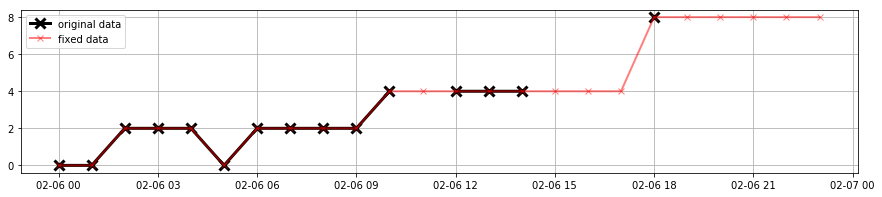

In [ ]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [107]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-02


In [117]:
import pandas as pd
weather_train = pd.read_csv('weather_train.csv')

#Filtramos por site_id y timestamp a weather_train.csv
weather_fileterd = weather_train[(weather_train['site_id'] == 3) & (weather_train['timestamp'].str.startswith('2016-02-02'))]

cloud_coverage_series = weather_fileterd['cloud_coverage']
cloud_coverage_series.head(24)

fixed_ts = cloud_coverage_series.ffill().tolist()

print(fixed_ts)
#weather_fileterd.head(24)



[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 6.0, 6.0, 6.0]


#### fill in your fixed time series

In [ ]:
# for instance
# fixed_ts = [6,6,6,4,4,5,6,7,7,7,6,6,6,5,4,3,2,2,1,1,1,2,3,4]
fixed_ts = [  ]

**submit your answer**

In [119]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24]


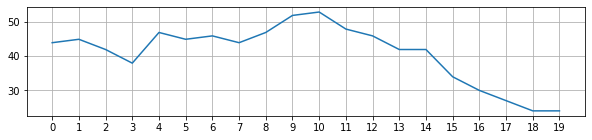

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts)


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24],
     [[30, 27, 24], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series.

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (21,3) and y dimensions will be (21)

Again, use any tool of your choice to generate your result.

#### fill in your answer


In [ ]:
X = [ [  ,  ,  ],
      [  ,  ,  ],
      [  ,  ,  ]
       ....
    ]

y = [ , , , , ... ]

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_03");